In [3]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Reshape
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from IPython.display import Audio



In [4]:
Savee = r"D:\aravind\A 3RD YEAR STUFF\DL PROJECT\Savee"


In [9]:

savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head(10)

Emotions                                               Path
0    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
1    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
2    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
3    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
4    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
5    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
6    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
7    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
8    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
9    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...

In [10]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.DataFrame(Savee_df)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
1    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
2    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
3    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...
4    angry  D:\aravind\A 3RD YEAR STUFF\DL PROJECT\SaveeDC...

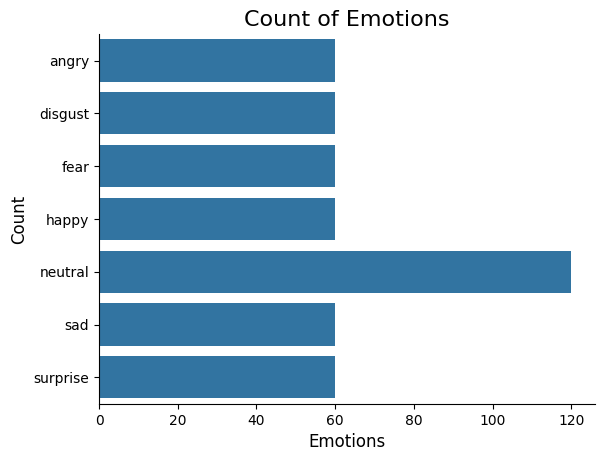

In [11]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [14]:
file_path = r'D:\aravind\A 3RD YEAR STUFF\DL PROJECT\Savee\DC_a01.wav'#.replace('\\', '/')
data, sr = librosa.load(file_path)


In [16]:
#DATA AUGMENTATION


# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

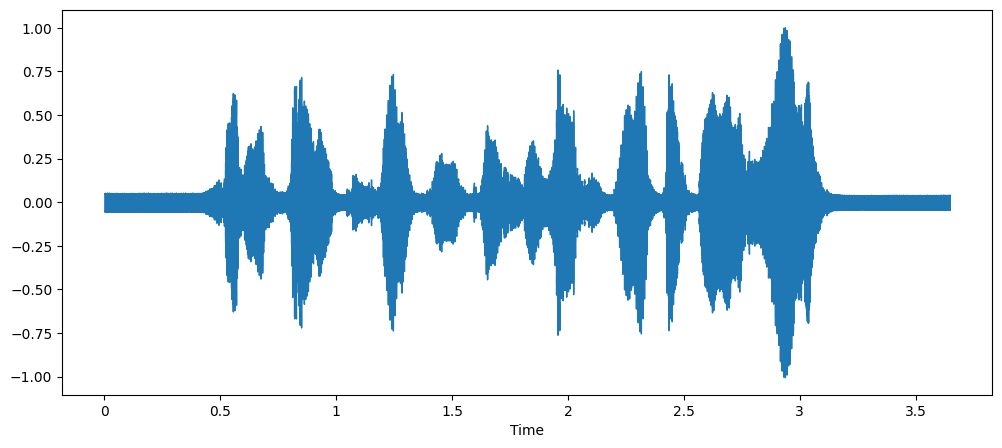

In [17]:
# NORMAL AUDIO
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)


In [18]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

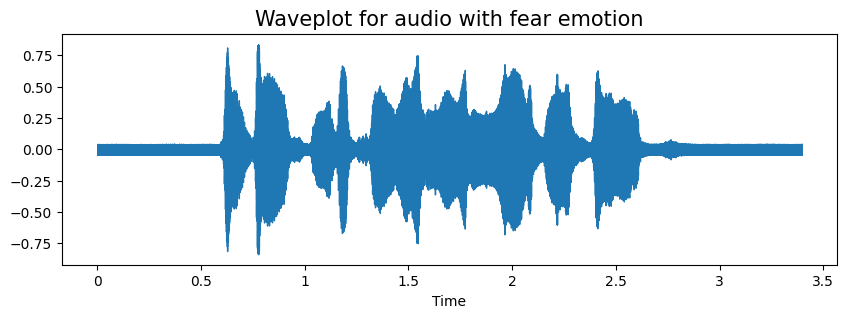

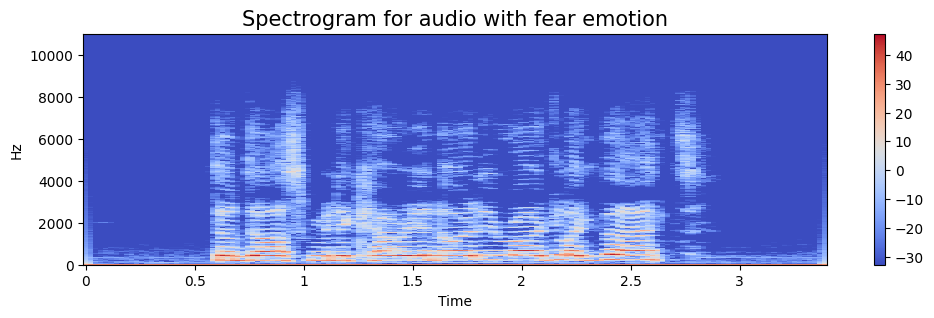

In [22]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1].replace('Savee','Savee/')
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


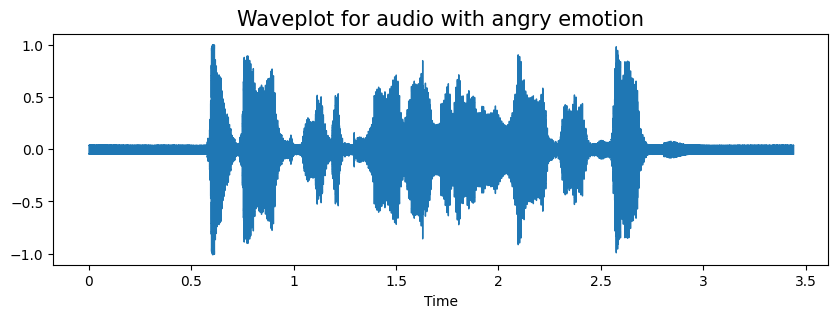

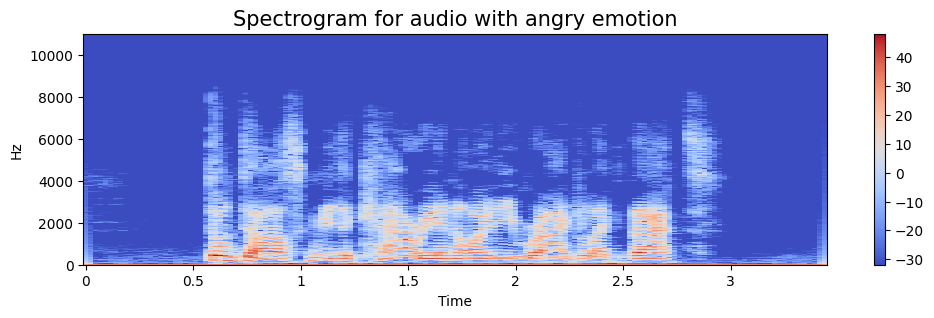

In [32]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1].replace('Savee', 'Savee/')
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

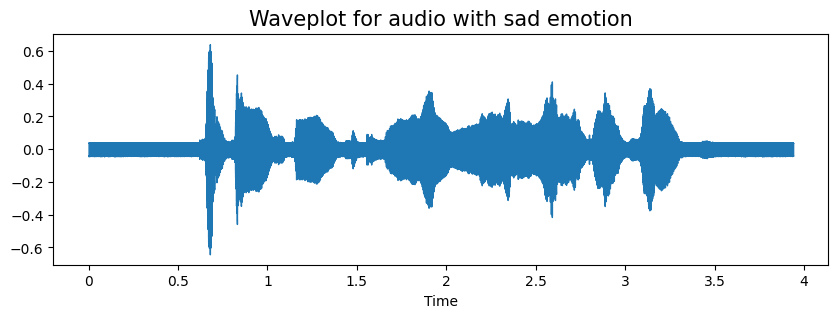

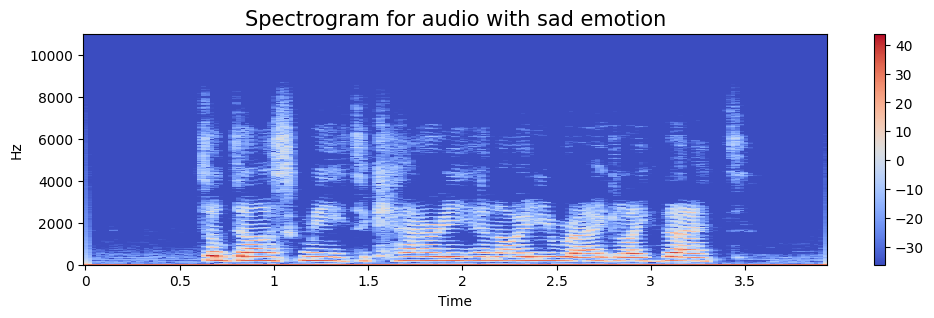

In [25]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1].replace('Savee', 'Savee/')
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

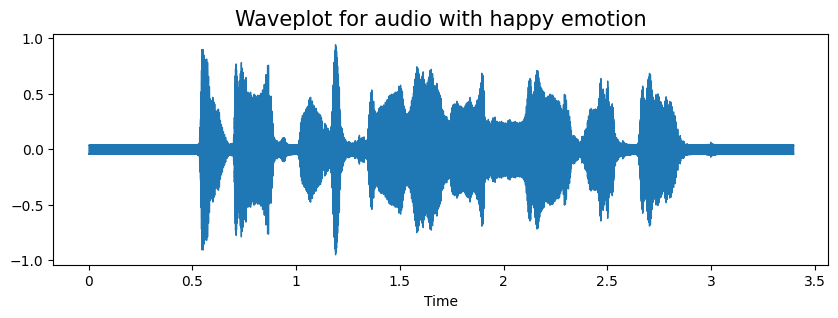

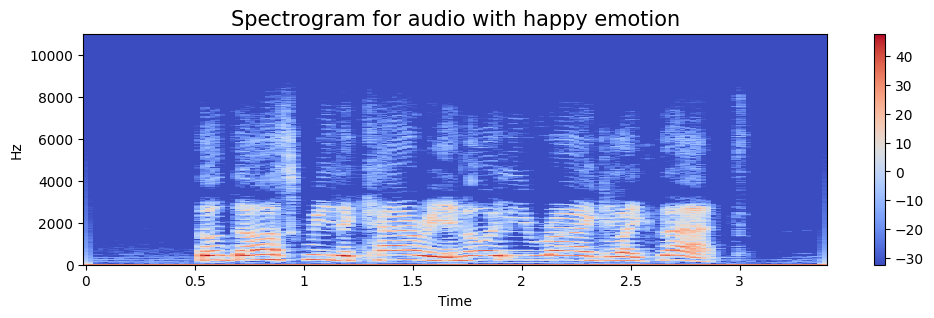

In [26]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1].replace('Savee', 'Savee/')
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

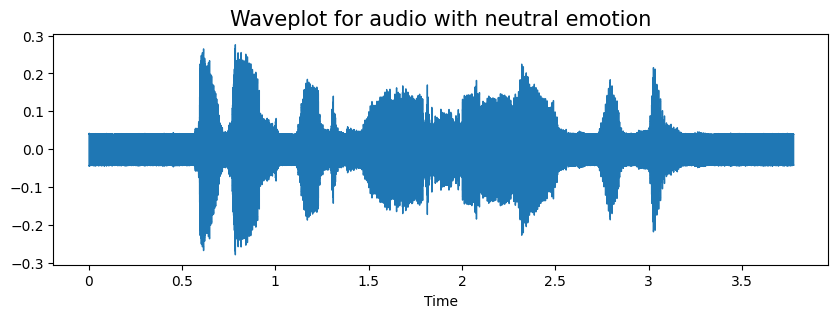

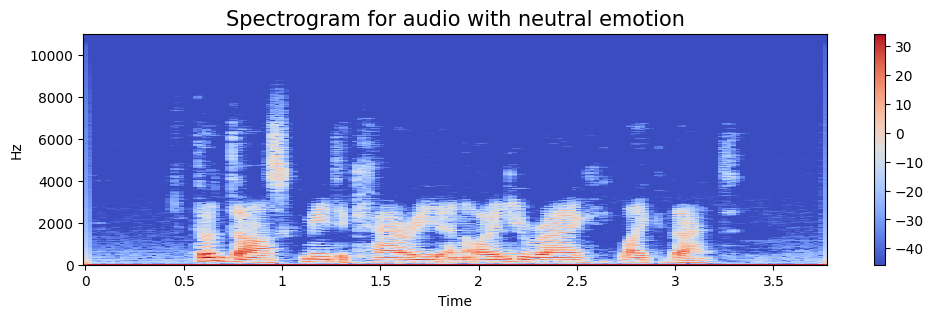

In [34]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1].replace('Savee', 'Savee/')
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)
#print(path)

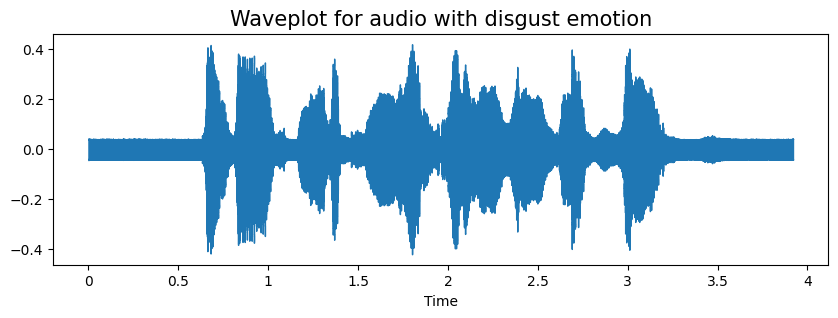

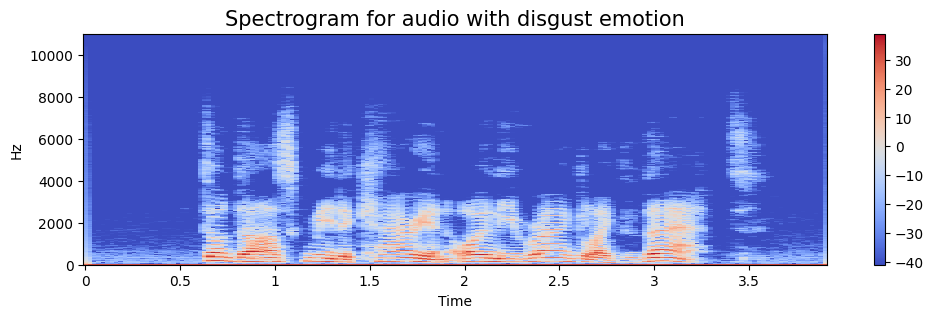

In [36]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1].replace('Savee', 'Savee/')
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


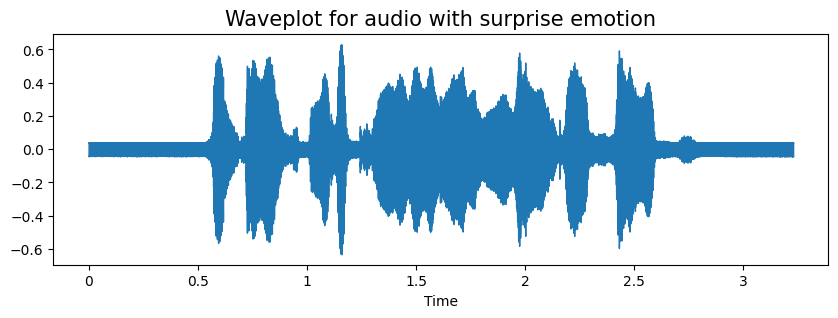

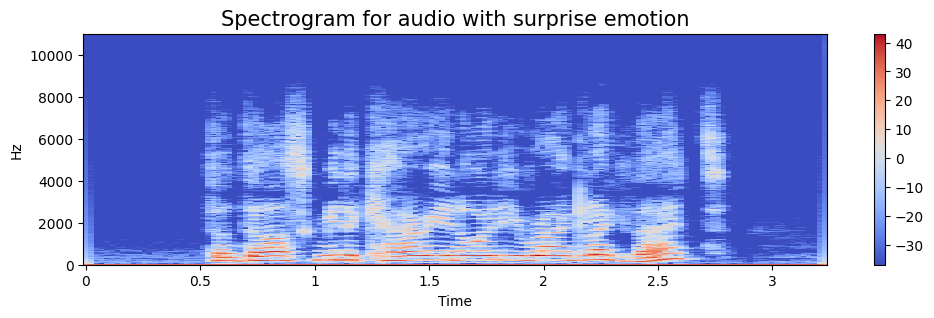

In [37]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1].replace('Savee', 'Savee/')
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


In [39]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    stretch_factor = 0.6
    return librosa.effects.time_stretch(data,rate=stretch_factor)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    n_steps = 4  # Example: Shift pitch up by 4 semitones
# Correctly apply pitch shift
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=n_steps)
#return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[2].replace('Savee', 'Savee/')
data, sample_rate = librosa.load(path)

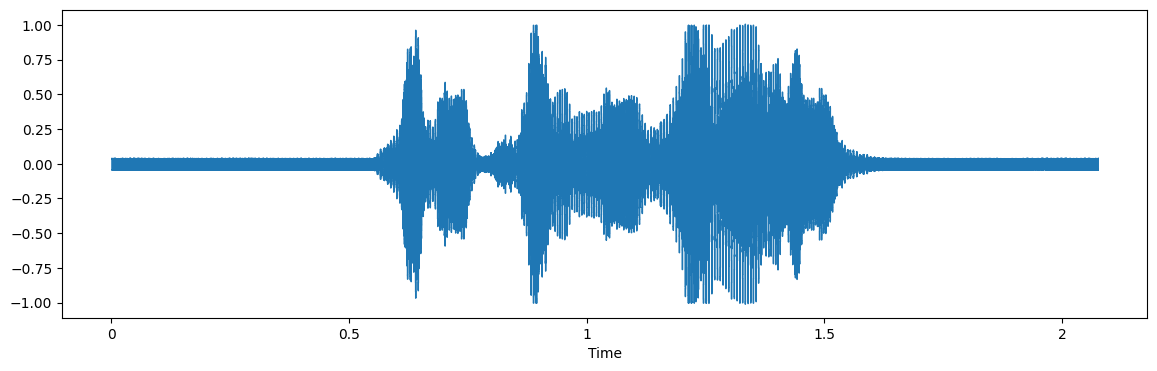

In [40]:
#Base audio
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

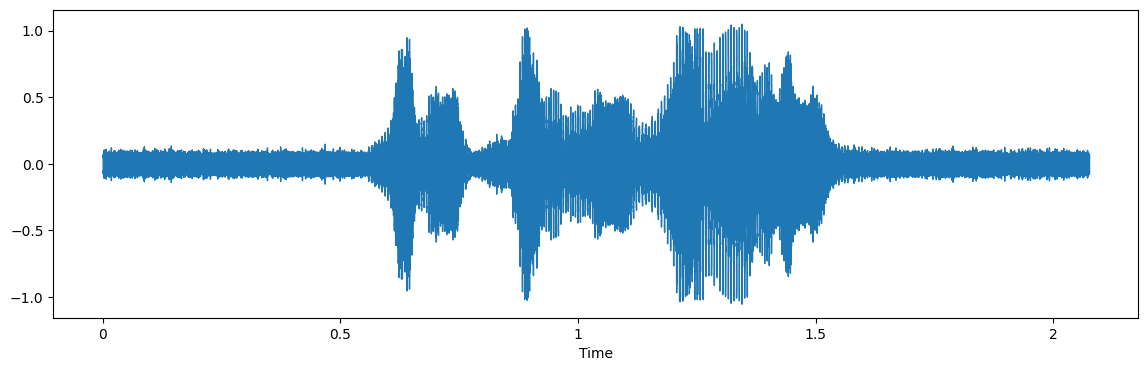

In [41]:
# ADD NOISE
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

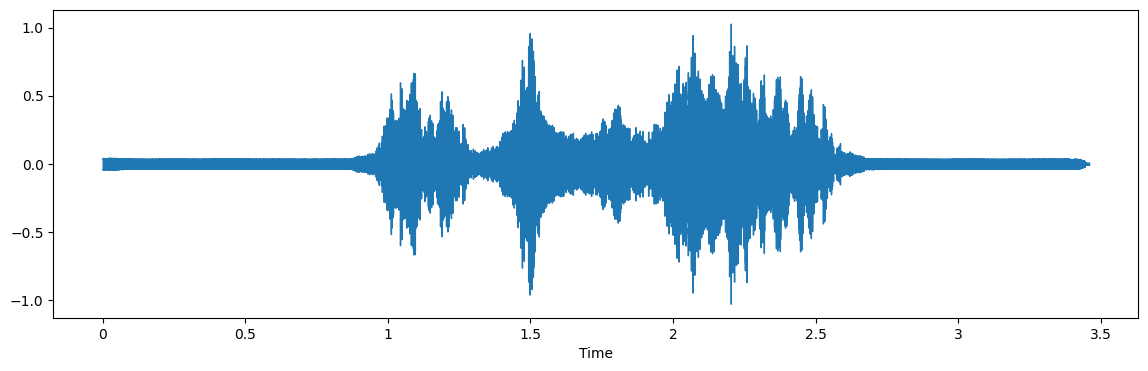

In [42]:
#STRETCHING THE AUDIO CLIP
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x,sr=sample_rate)
Audio(x, rate=sample_rate)

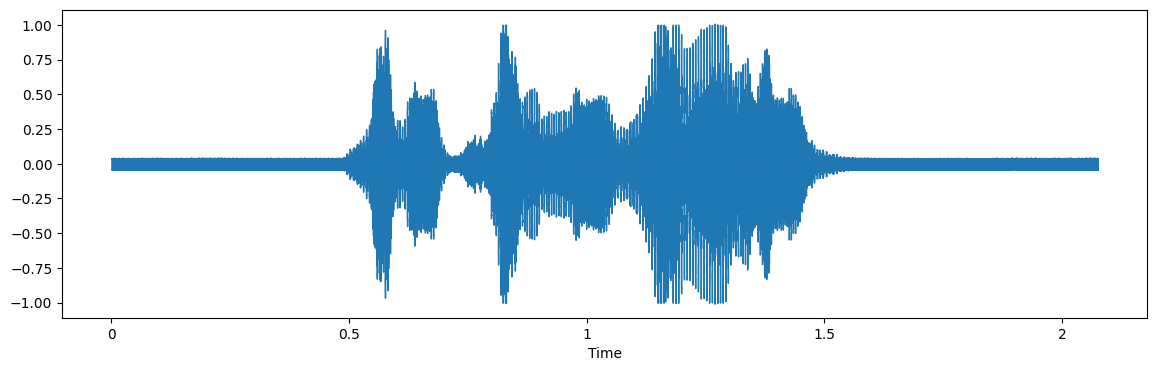

In [43]:
#Shifting the audio clip
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

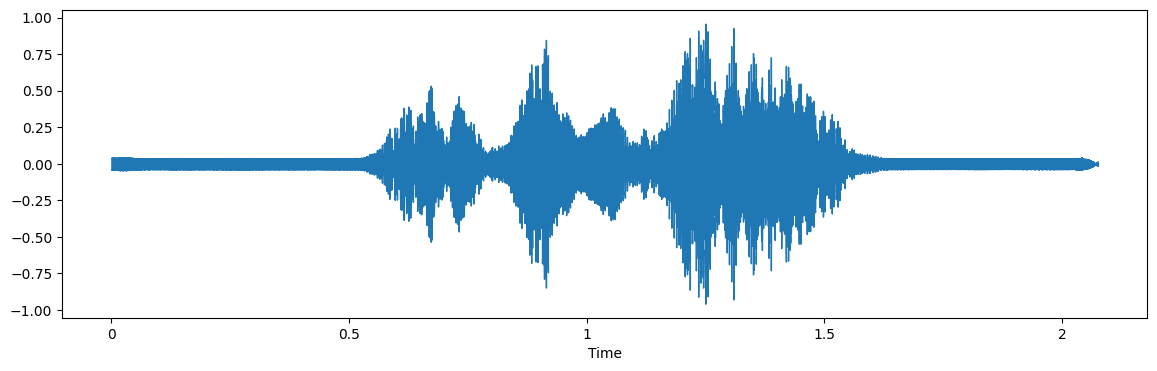

In [44]:
#Pitch adjustment
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [45]:
def extract_features(data):
    result = np.array([])
    
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))

    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN model...
Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2060 - loss: 1.9552 - val_accuracy: 0.3233 - val_loss: 1.8452
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2871 - loss: 1.8723 - val_accuracy: 0.3533 - val_loss: 1.7121
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3162 - loss: 1.8129 - val_accuracy: 0.3633 - val_loss: 1.6192
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3336 - loss: 1.7150 - val_accuracy: 0.3758 - val_loss: 1.6060
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3475 - loss: 1.6292 - val_accuracy: 0.3717 - val_loss: 1.5262
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3430 - loss: 1.5856 - val_accuracy: 0.3925 - val_loss: 1.4081
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3618 - loss: 1.5081 - val_accuracy: 0.4075 - val_loss: 1.3494
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3876 - loss

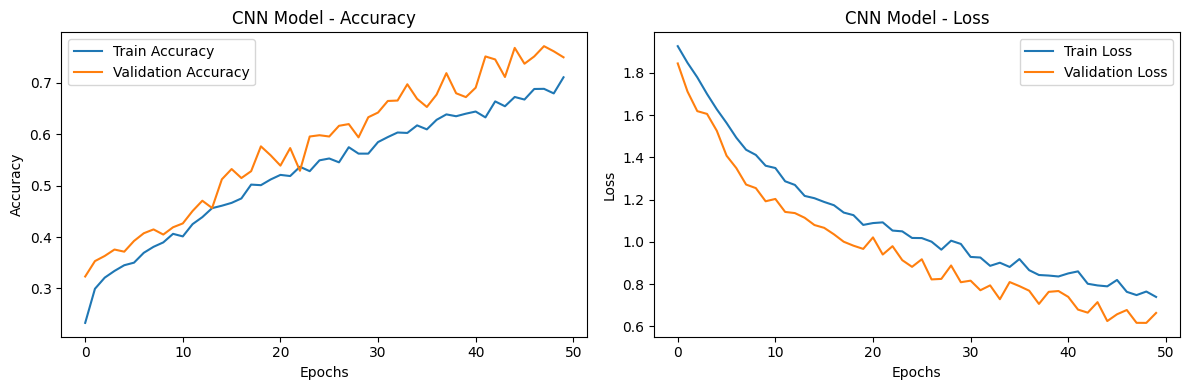

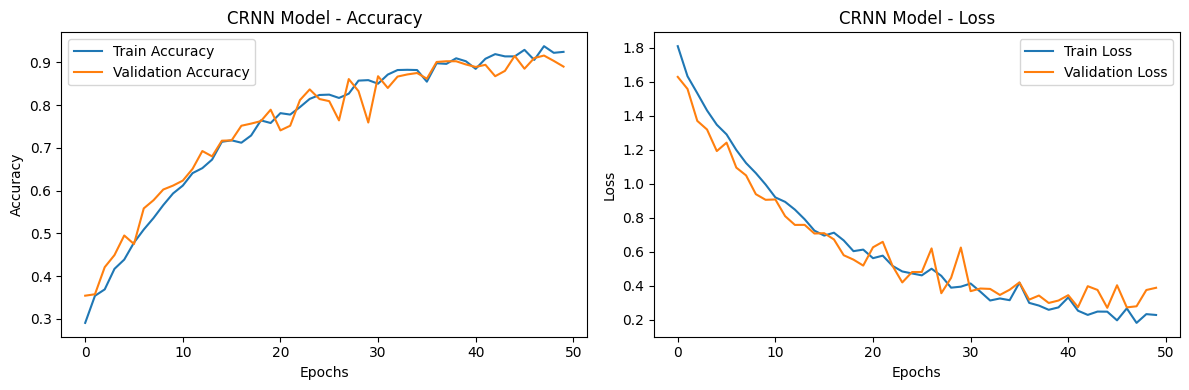

CNN Model Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_21 (Conv1D)              │ (None, 162, 128)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 81, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 81, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 41, 32)         │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 21, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 672)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │        43,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,343 (1.12 MB)

 Trainable params: 97,447 (380.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 194,896 (761.32 KB)

CRNN Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 81, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 41, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1344)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 21, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,311 (3.62 MB)

 Trainable params: 316,103 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 632,208 (2.41 MB)

In [50]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense, Flatten, Reshape

# Load and preprocess dataset (RAVDESS)
X, Y = [], []
for path, emotion in zip(Savee_df.Path, Savee_df.Emotions):
    data, sample_rate = librosa.load(path.replace('Savee','Savee/'), duration=3, offset=0.6)
    feature = extract_features(data)
    X.append(feature)
    Y.append(emotion)

    # Data augmentation
    for _ in range(3):
        X.append(extract_features(noise(data)))
        Y.append(emotion)
        X.append(extract_features(stretch(data)))
        Y.append(emotion)
        X.append(extract_features(pitch(data, sample_rate)))
        Y.append(emotion)

# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Reshape features for CNN/CRNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Standardize features
scaler = StandardScaler()
X_flattened = X.reshape(-1, X.shape[-2])
X_scaled = scaler.fit_transform(X_flattened)
X = X_scaled.reshape(X.shape[0], X.shape[1], 1)

# One-hot encode the labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.reshape(-1, 1)).toarray()

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# CRNN Model
crnn_model = Sequential()
crnn_model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
crnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
crnn_model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
crnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
crnn_model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
crnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
crnn_model.add(Flatten())
crnn_model.add(Reshape((21, 64)))  # Adjust this reshape based on data
crnn_model.add(Bidirectional(LSTM(64, return_sequences=True)))
crnn_model.add(Dropout(0.5))
crnn_model.add(Bidirectional(LSTM(32)))
crnn_model.add(Dense(32, activation='relu'))
crnn_model.add(Dropout(0.5))
crnn_model.add(Dense(7, activation='softmax'))  # 7 classes
crnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.7))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.7))
cnn_model.add(Dense(7, activation='softmax'))  # 7 classes
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train both models for 50 epochs
print("Training CNN model...")
history_cnn = cnn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

print("Training CRNN model...")
history_crnn = crnn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Evaluate both models
cnn_eval = cnn_model.evaluate(x_test, y_test)
crnn_eval = crnn_model.evaluate(x_test, y_test)

# Print evaluation results
print(f"CNN Test Accuracy: {cnn_eval[1]}")
print(f"CRNN Test Accuracy: {crnn_eval[1]}")

# Plotting accuracy and loss
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot results for CNN
plot_history(history_cnn, "CNN Model")

# Plot results for CRNN
plot_history(history_crnn, "CRNN Model")

# Display both model summaries
print("CNN Model Summary:")
cnn_model.summary()

print("CRNN Model Summary:")
crnn_model.summary()


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Python312\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training CNN model...
Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1970 - loss: 1.9352 - val_accuracy: 0.3125 - val_loss: 1.8118
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2670 - loss: 1.8184 - val_accuracy: 0.3550 - val_loss: 1.6982
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3110 - loss: 1.7330 - val_accuracy: 0.3608 - val_loss: 1.5855
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3361 - loss: 1.6644 - val_accuracy: 0.3558 - val_loss: 1.5040
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3722 - loss: 1.5841 - val_accuracy: 0.3867 - val_loss: 1.4591
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3523 - loss: 1.5566 - val_accuracy: 0.3908 - val_loss: 1.3901
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3688 - loss: 1.4741 - val_accuracy: 0.3983 - val_loss: 1.3521
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3743 - loss: 1.

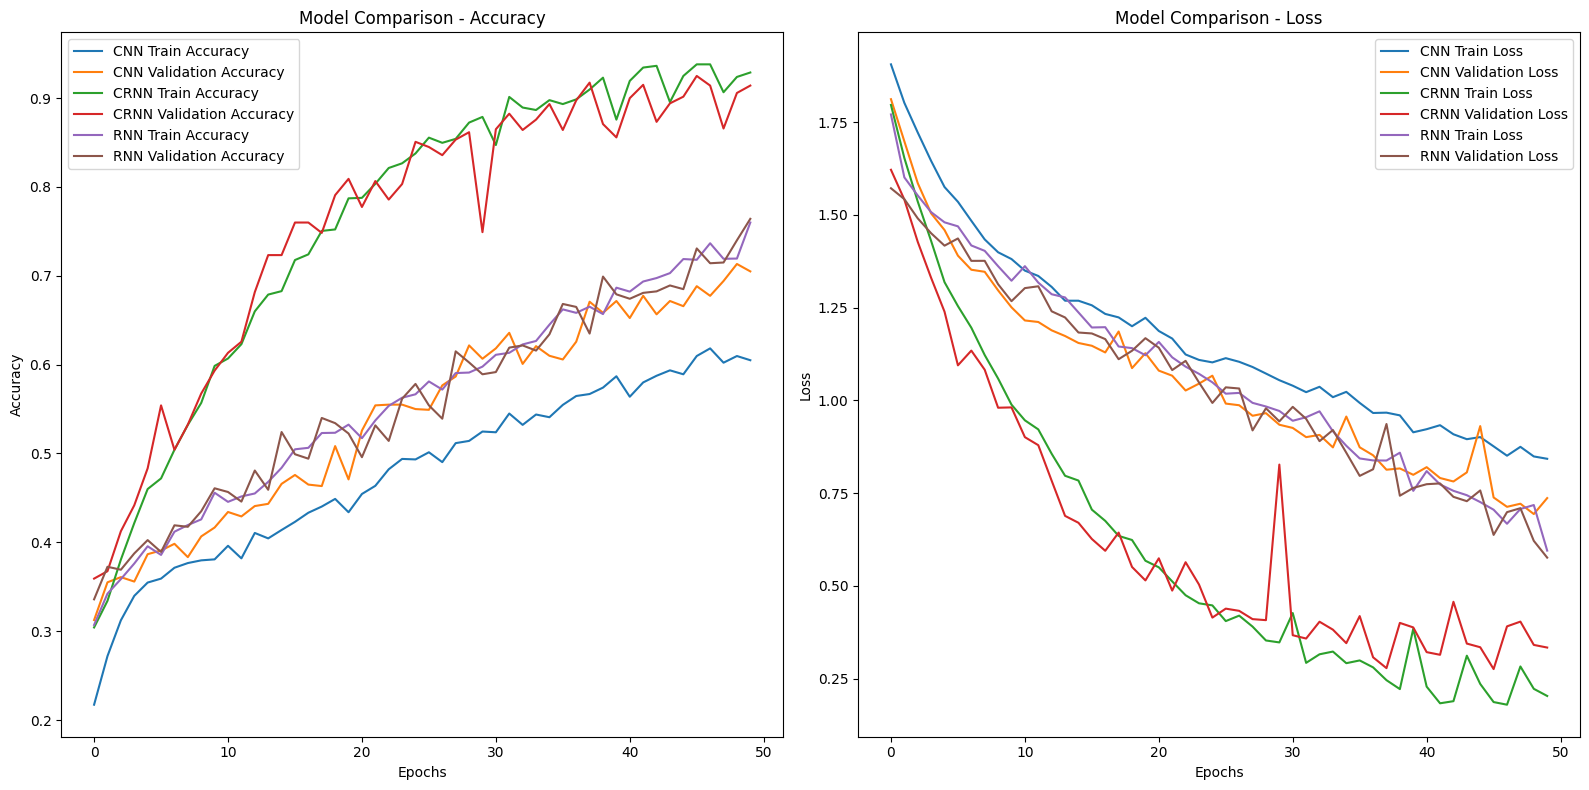

CNN Model Summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_27 (Conv1D)              │ (None, 162, 128)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 81, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 81, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_28 (MaxPooling1D) │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_29 (Conv1D)              │ (None, 41, 32)         │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_29 (MaxPooling1D) │ (None, 21, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 672)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │        43,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,343 (1.12 MB)

 Trainable params: 97,447 (380.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 194,896 (761.32 KB)

CRNN Model Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_24 (Conv1D)              │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_25 (Conv1D)              │ (None, 81, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_26 (Conv1D)              │ (None, 41, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1344)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 21, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,311 (3.62 MB)

 Trainable params: 316,103 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 632,208 (2.41 MB)

RNN Model Summary:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_5 (Reshape)             │ (None, 162, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 162, 256)       │       133,120 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 128)            │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 924,119 (3.53 MB)

 Trainable params: 308,039 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 616,080 (2.35 MB)

In [55]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense, Flatten, Reshape

# Load and preprocess dataset (RAVDESS)
X, Y = [], []
for path, emotion in zip(Savee_df.Path, Savee_df.Emotions):
    data, sample_rate = librosa.load(path.replace('Savee', 'Savee/'), duration=3, offset=0.6)
    feature = extract_features(data)
    X.append(feature)
    Y.append(emotion)

    # Data augmentation
    for _ in range(3):
        X.append(extract_features(noise(data)))
        Y.append(emotion)
        X.append(extract_features(stretch(data)))
        Y.append(emotion)
        X.append(extract_features(pitch(data, sample_rate)))
        Y.append(emotion)

# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Reshape features for CNN/CRNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Standardize features
scaler = StandardScaler()
X_flattened = X.reshape(-1, X.shape[-2])
X_scaled = scaler.fit_transform(X_flattened)
X = X_scaled.reshape(X.shape[0], X.shape[1], 1)

# One-hot encode the labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.reshape(-1, 1)).toarray()

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# CRNN Model
crnn_model = Sequential()
crnn_model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
crnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
crnn_model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
crnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
crnn_model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
crnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
crnn_model.add(Flatten())
crnn_model.add(Reshape((21, 64)))  # Adjust this reshape based on data
crnn_model.add(Bidirectional(LSTM(64, return_sequences=True)))
crnn_model.add(Dropout(0.5))
crnn_model.add(Bidirectional(LSTM(32)))
crnn_model.add(Dense(32, activation='relu'))
crnn_model.add(Dropout(0.5))
crnn_model.add(Dense(7, activation='softmax'))  # 7 classes
crnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(7, activation='softmax'))  # 7 classes
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# RNN Model
rnn_model = Sequential()
rnn_model.add(Reshape((x_train.shape[1], 1), input_shape=(x_train.shape[1], 1)))  # Reshape input for RNN
rnn_model.add(Bidirectional(LSTM(128, return_sequences=True)))
rnn_model.add(Dropout(0.5))
rnn_model.add(Bidirectional(LSTM(64)))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(7, activation='softmax'))  # 7 classes for RAVDESS emotions
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train all models for 50 epochs
print("Training CNN model...")
history_cnn = cnn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

print("Training CRNN model...")
history_crnn = crnn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

print("Training RNN model...")
history_rnn = rnn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Evaluate all models
cnn_eval = cnn_model.evaluate(x_test, y_test)
crnn_eval = crnn_model.evaluate(x_test, y_test)
rnn_eval = rnn_model.evaluate(x_test, y_test)

# Print evaluation results
print(f"CNN Test Accuracy: {cnn_eval[1]}")
print(f"CRNN Test Accuracy: {crnn_eval[1]}")
print(f"RNN Test Accuracy: {rnn_eval[1]}")

# Plotting accuracy and loss for all models
def plot_history(histories, title):
    plt.figure(figsize=(16, 8))
    
    for history, model_name in histories:
        # Plot accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label=f'{model_name} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label=f'{model_name} Train Loss')
        plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss')

    # Set titles and labels
    plt.subplot(1, 2, 1)
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Prepare histories for plotting
histories = [(history_cnn, "CNN"), (history_crnn, "CRNN"), (history_rnn, "RNN")]

# Plot results for all models
plot_history(histories, "Model Comparison")

# Display summaries of all models
print("CNN Model Summary:")
cnn_model.summary()

print("CRNN Model Summary:")
crnn_model.summary()

print("RNN Model Summary:")
rnn_model.summary()


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


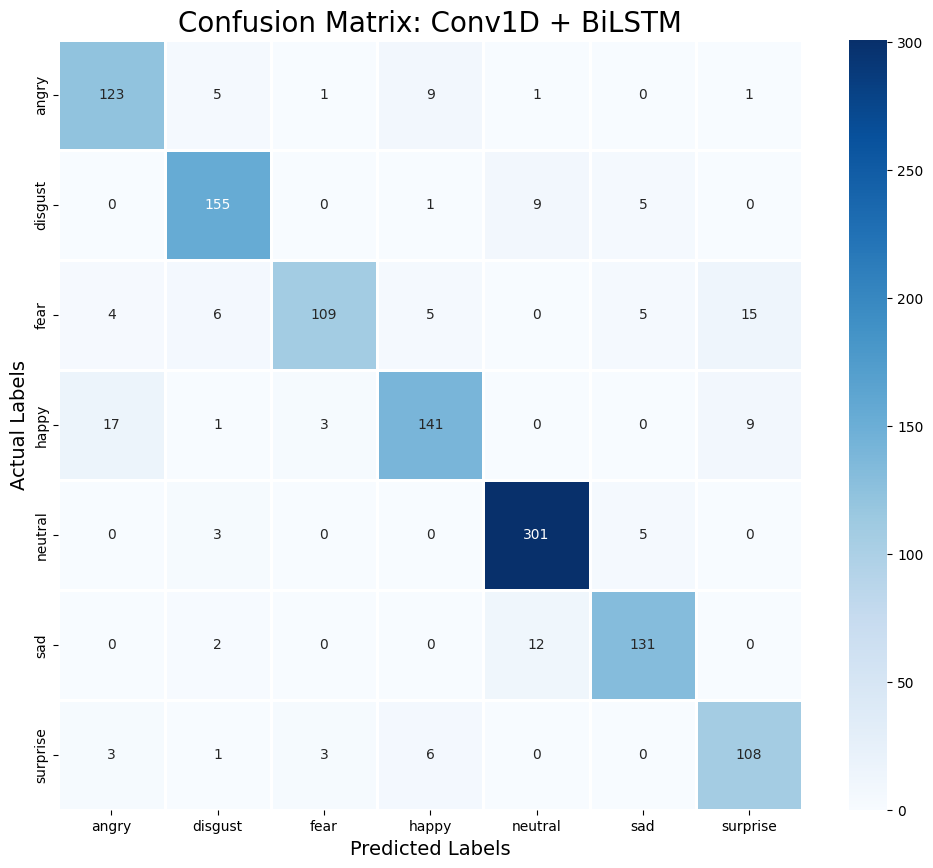

Classification Report: Conv1D + BiLSTM
              precision    recall  f1-score   support

       angry       0.84      0.88      0.86       140
     disgust       0.90      0.91      0.90       170
        fear       0.94      0.76      0.84       144
       happy       0.87      0.82      0.85       171
     neutral       0.93      0.97      0.95       309
         sad       0.90      0.90      0.90       145
    surprise       0.81      0.89      0.85       121

    accuracy                           0.89      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.89      0.89      0.89      1200



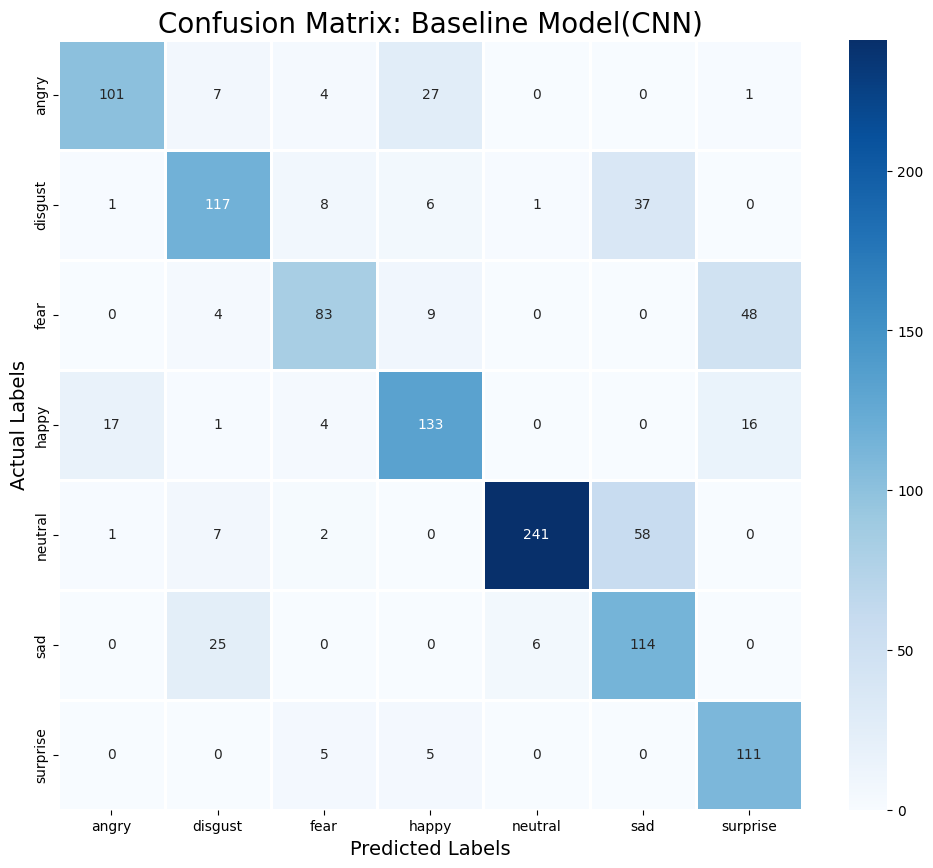

Classification Report: Baseline Model(CNN)
              precision    recall  f1-score   support

       angry       0.84      0.72      0.78       140
     disgust       0.73      0.69      0.71       170
        fear       0.78      0.58      0.66       144
       happy       0.74      0.78      0.76       171
     neutral       0.97      0.78      0.87       309
         sad       0.55      0.79      0.64       145
    surprise       0.63      0.92      0.75       121

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.74      1200
weighted avg       0.78      0.75      0.75      1200



In [54]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for Model 1 (Conv1D + BiLSTM)
pred_test_crnn_model = crnn_model.predict(x_test)
y_pred_crnn_model = encoder.inverse_transform(pred_test_crnn_model)
y_test_actual = encoder.inverse_transform(y_test)

# Predictions for Model 2 (Baseline Model)
pred_test_cnn_model = cnn_model.predict(x_test)
y_pred_cnn_model = encoder.inverse_transform(pred_test_cnn_model)

# Create DataFrame for both models' predictions and actual labels
df_crnn_model = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_crnn_model['Predicted Labels'] = y_pred_crnn_model.flatten()
df_crnn_model['Actual Labels'] = y_test_actual.flatten()

df_cnn_model = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_cnn_model['Predicted Labels'] = y_pred_cnn_model.flatten()
df_cnn_model['Actual Labels'] = y_test_actual.flatten()

# Display first 10 rows of predictions for both models
#print("Model 1 Predictions (Conv1D + BiLSTM):")
#print(df_crnn_model.head(10))

#print("\nModel 2 Predictions (Baseline):")
#print(df_cnn_model.head(10))

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, encoder, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 10))
    cm_df = pd.DataFrame(cm, index=[i for i in encoder.categories_[0]], 
                         columns=[i for i in encoder.categories_[0]])
    sns.heatmap(cm_df, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
    plt.title(f'Confusion Matrix: {model_name}', size=20)
    plt.xlabel('Predicted Labels', size=14)
    plt.ylabel('Actual Labels', size=14)
    plt.show()

# Function to print classification report
def print_classification_report(y_test, y_pred, model_name):
    print(f"Classification Report: {model_name}")
    print(classification_report(y_test, y_pred))

# Confusion Matrix and Classification Report for Model 1 (Conv1D + BiLSTM)
plot_confusion_matrix(y_test_actual, y_pred_crnn_model, encoder, model_name="Conv1D + BiLSTM")
print_classification_report(y_test_actual, y_pred_crnn_model, model_name="Conv1D + BiLSTM")

# Confusion Matrix and Classification Report for Model 2 (Baseline Model)
plot_confusion_matrix(y_test_actual, y_pred_cnn_model, encoder, model_name="Baseline Model(CNN)")
print_classification_report(y_test_actual, y_pred_cnn_model, model_name="Baseline Model(CNN)")


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN + GRU model...
Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.2407 - loss: 1.8598 - val_accuracy: 0.3783 - val_loss: 1.5866
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3326 - loss: 1.6658 - val_accuracy: 0.4042 - val_loss: 1.4742
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3851 - loss: 1.5308 - val_accuracy: 0.4450 - val_loss: 1.3553
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4230 - loss: 1.3997 - val_accuracy: 0.4700 - val_loss: 1.2463
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4773 - loss: 1.2661 - val_accuracy: 0.5042 - val_loss: 1.1909
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4888 - loss: 1.2158 - val_accuracy: 0.5567 - val_loss: 1.0557
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5206 - loss: 1.1409 - val_accuracy: 0.5917 - val_loss: 0.9880
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5

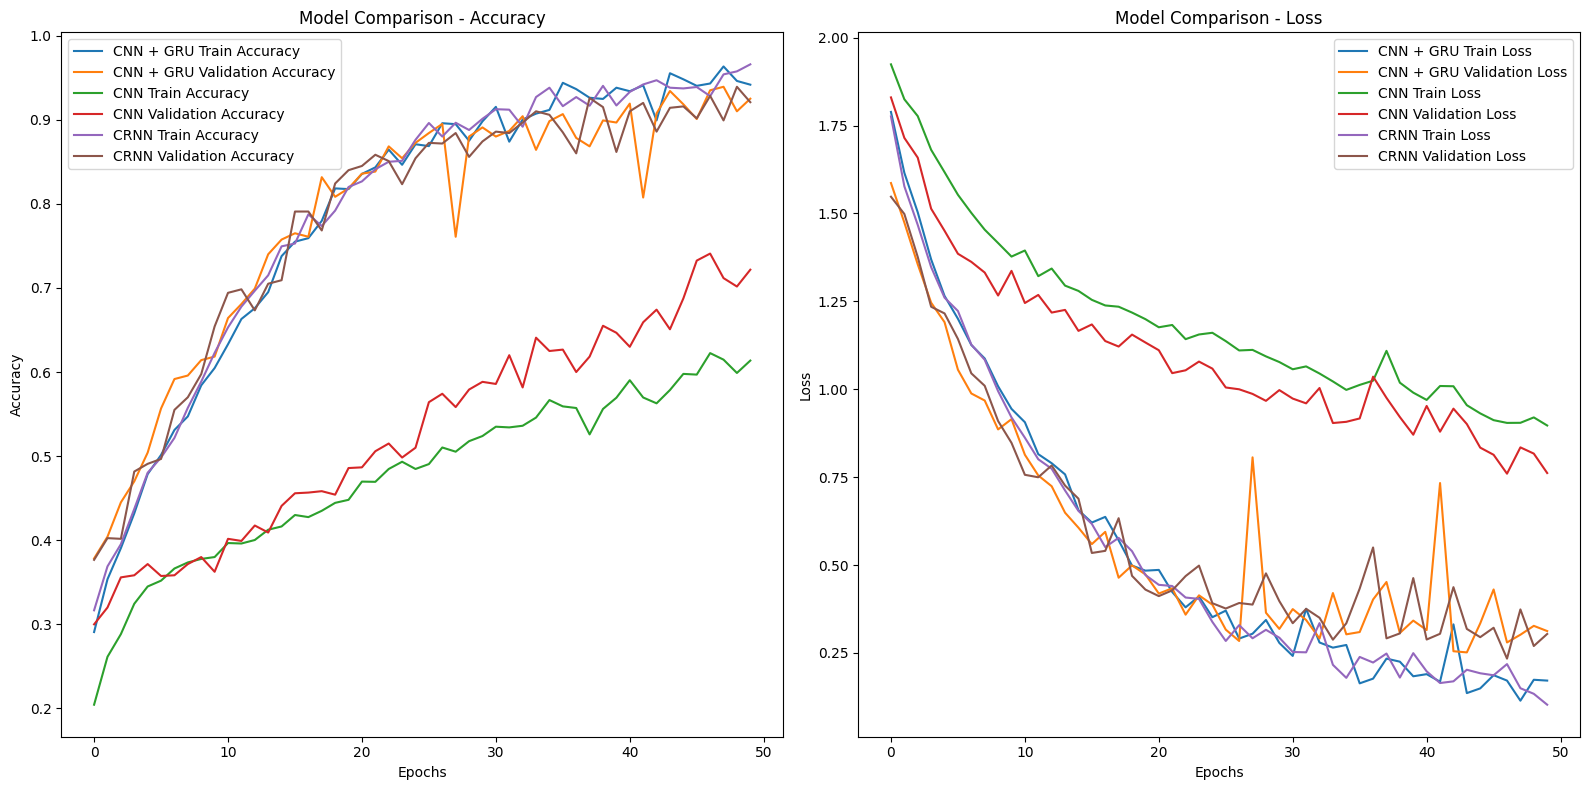

CNN + GRU Model Summary:


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_36 (Conv1D)              │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_36 (MaxPooling1D) │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_37 (Conv1D)              │ (None, 81, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_37 (MaxPooling1D) │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_38 (Conv1D)              │ (None, 41, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_38 (MaxPooling1D) │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1344)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ (None, 21, 128)        │        49,920 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_17                │ (None, 64)             │        31,104 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869,591 (3.32 MB)

 Trainable params: 289,863 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 579,728 (2.21 MB)

CNN Model Summary:


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_39 (Conv1D)              │ (None, 162, 128)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_39 (MaxPooling1D) │ (None, 81, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_40 (Conv1D)              │ (None, 81, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_40 (MaxPooling1D) │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_41 (Conv1D)              │ (None, 41, 32)         │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_41 (MaxPooling1D) │ (None, 21, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 672)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │        43,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,343 (1.12 MB)

 Trainable params: 97,447 (380.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 194,896 (761.32 KB)

CRNN Model Summary:


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_42 (Conv1D)              │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_42 (MaxPooling1D) │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_43 (Conv1D)              │ (None, 81, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_43 (MaxPooling1D) │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_44 (Conv1D)              │ (None, 41, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_44 (MaxPooling1D) │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1344)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_18                │ (None, 21, 128)        │        49,920 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_19                │ (None, 64)             │        31,104 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869,591 (3.32 MB)

 Trainable params: 289,863 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 579,728 (2.21 MB)

In [58]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, GRU, Dropout, Dense, Flatten, Reshape

# Load and preprocess dataset (RAVDESS)
X, Y = [], []
for path, emotion in zip(Savee_df.Path, Savee_df.Emotions):
    data, sample_rate = librosa.load(path.replace('Savee', 'Savee/'), duration=3, offset=0.6)
    feature = extract_features(data)
    X.append(feature)
    Y.append(emotion)

    # Data augmentation
    for _ in range(3):
        X.append(extract_features(noise(data)))
        Y.append(emotion)
        X.append(extract_features(stretch(data)))
        Y.append(emotion)
        X.append(extract_features(pitch(data, sample_rate)))
        Y.append(emotion)

# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Reshape features for CNN/CRNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Standardize features
scaler = StandardScaler()
X_flattened = X.reshape(-1, X.shape[-2])
X_scaled = scaler.fit_transform(X_flattened)
X = X_scaled.reshape(X.shape[0], X.shape[1], 1)

# One-hot encode the labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.reshape(-1, 1)).toarray()

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# CNN + GRU Model
cnn_gru_model = Sequential()
cnn_gru_model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_gru_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_gru_model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_gru_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_gru_model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_gru_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_gru_model.add(Flatten())

# Reshape to match the input for GRU
cnn_gru_model.add(Reshape((21, 64)))  # Adjust this reshape based on data
cnn_gru_model.add(Bidirectional(GRU(64, return_sequences=True)))
cnn_gru_model.add(Dropout(0.5))
cnn_gru_model.add(Bidirectional(GRU(32)))
cnn_gru_model.add(Dense(32, activation='relu'))
cnn_gru_model.add(Dropout(0.5))
cnn_gru_model.add(Dense(7, activation='softmax'))  # 7 classes
cnn_gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.7))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.7))
cnn_model.add(Dense(7, activation='softmax'))  # 7 classes
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CRNN Model (Conv1D + BiGRU)
crnn_model = Sequential()
crnn_model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
crnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
crnn_model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
crnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
crnn_model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
crnn_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
crnn_model.add(Flatten())
crnn_model.add(Reshape((21, 64)))  # Adjust this reshape based on data
crnn_model.add(Bidirectional(GRU(64, return_sequences=True)))
crnn_model.add(Dropout(0.5))
crnn_model.add(Bidirectional(GRU(32)))
crnn_model.add(Dense(32, activation='relu'))
crnn_model.add(Dropout(0.5))
crnn_model.add(Dense(7, activation='softmax'))  # 7 classes
crnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train all models for 50 epochs
print("Training CNN + GRU model...")
history_cnn_gru = cnn_gru_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

print("Training CNN model...")
history_cnn = cnn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

print("Training CRNN model...")
history_crnn = crnn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Evaluate all models
cnn_gru_eval = cnn_gru_model.evaluate(x_test, y_test)
cnn_eval = cnn_model.evaluate(x_test, y_test)
crnn_eval = crnn_model.evaluate(x_test, y_test)

# Print evaluation results
print(f"CNN + GRU Test Accuracy: {cnn_gru_eval[1]}")
print(f"CNN Test Accuracy: {cnn_eval[1]}")
print(f"CRNN Test Accuracy: {crnn_eval[1]}")

# Plotting accuracy and loss for all models
def plot_history(histories, title):
    plt.figure(figsize=(16, 8))
    
    for history, model_name in histories:
        # Plot accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label=f'{model_name} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label=f'{model_name} Train Loss')
        plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss')

    # Set titles and labels
    plt.subplot(1, 2, 1)
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Prepare histories for plotting
histories = [(history_cnn_gru, "CNN + GRU"), (history_cnn, "CNN"), (history_crnn, "CRNN")]

# Plot results for all models
plot_history(histories, "Model Comparison")

# Display summaries of all models
print("CNN + GRU Model Summary:")
cnn_gru_model.summary()

print("CNN Model Summary:")
cnn_model.summary()

print("CRNN Model Summary:")
crnn_model.summary()


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


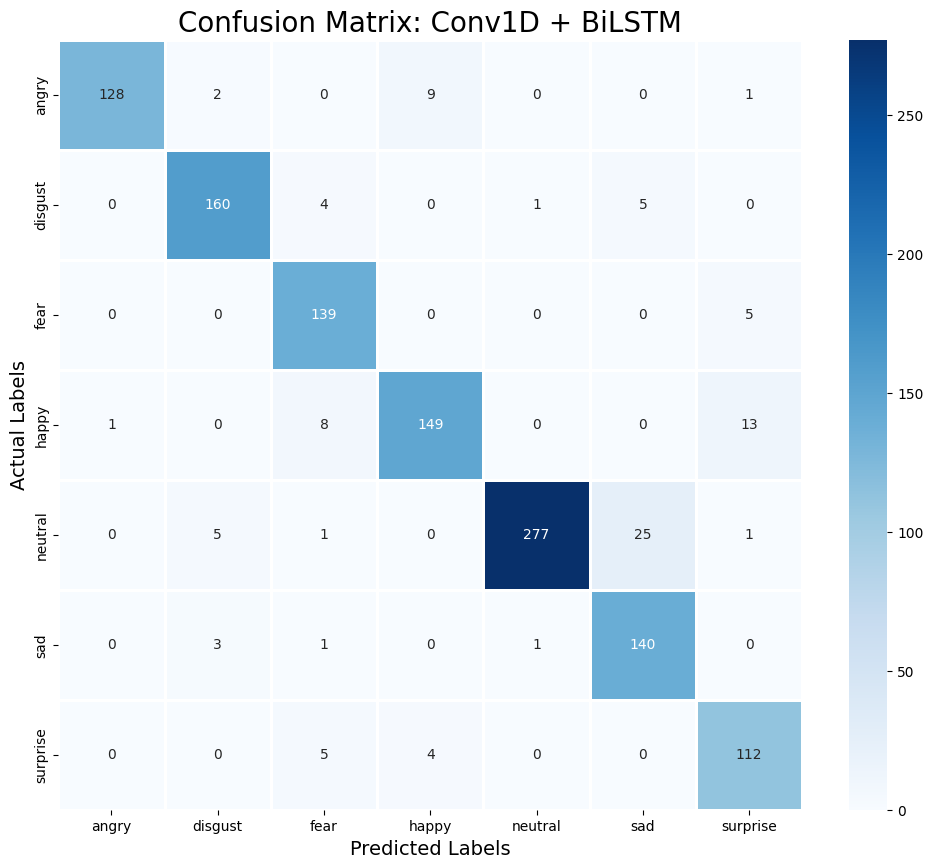

Classification Report: Conv1D + BiLSTM
              precision    recall  f1-score   support

       angry       0.99      0.91      0.95       140
     disgust       0.94      0.94      0.94       170
        fear       0.88      0.97      0.92       144
       happy       0.92      0.87      0.89       171
     neutral       0.99      0.90      0.94       309
         sad       0.82      0.97      0.89       145
    surprise       0.85      0.93      0.89       121

    accuracy                           0.92      1200
   macro avg       0.91      0.93      0.92      1200
weighted avg       0.93      0.92      0.92      1200



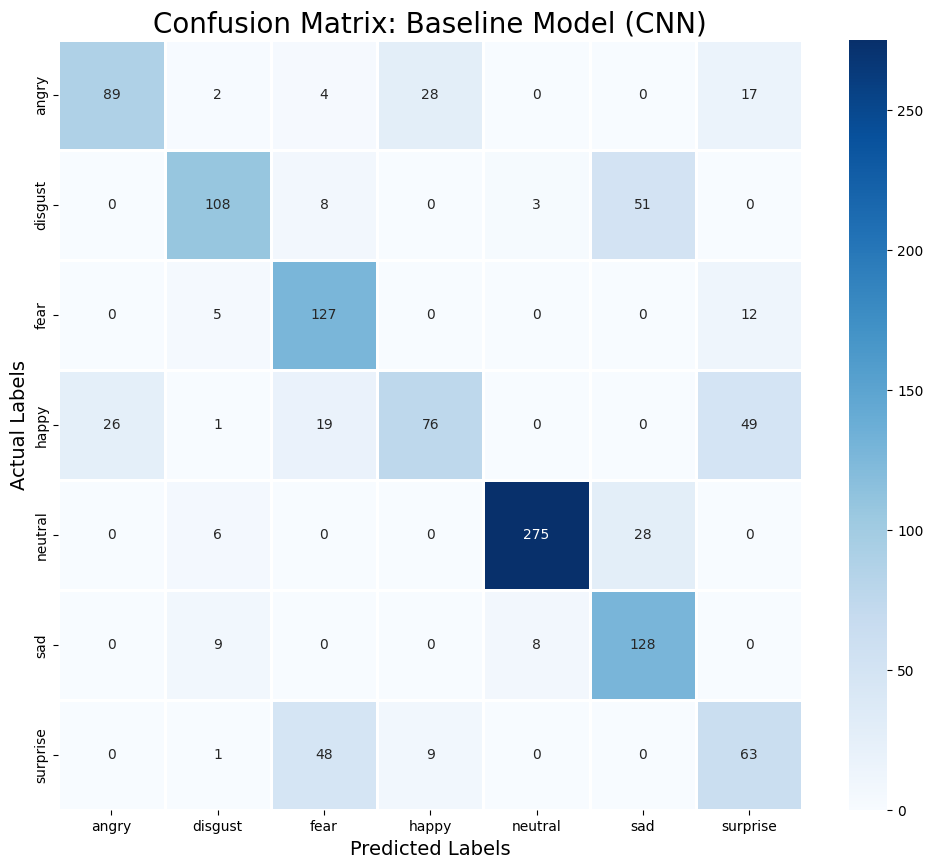

Classification Report: Baseline Model (CNN)
              precision    recall  f1-score   support

       angry       0.77      0.64      0.70       140
     disgust       0.82      0.64      0.72       170
        fear       0.62      0.88      0.73       144
       happy       0.67      0.44      0.54       171
     neutral       0.96      0.89      0.92       309
         sad       0.62      0.88      0.73       145
    surprise       0.45      0.52      0.48       121

    accuracy                           0.72      1200
   macro avg       0.70      0.70      0.69      1200
weighted avg       0.74      0.72      0.72      1200



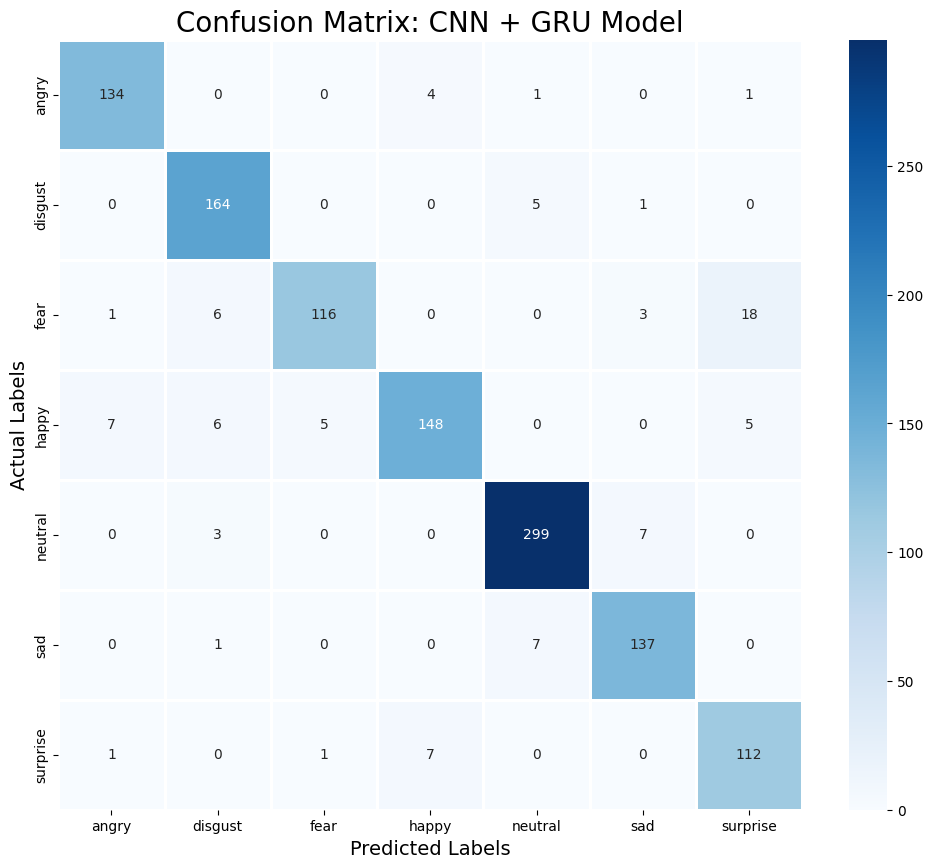

Classification Report: CNN + GRU Model
              precision    recall  f1-score   support

       angry       0.94      0.96      0.95       140
     disgust       0.91      0.96      0.94       170
        fear       0.95      0.81      0.87       144
       happy       0.93      0.87      0.90       171
     neutral       0.96      0.97      0.96       309
         sad       0.93      0.94      0.94       145
    surprise       0.82      0.93      0.87       121

    accuracy                           0.93      1200
   macro avg       0.92      0.92      0.92      1200
weighted avg       0.93      0.93      0.92      1200



In [59]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for Model 1 (Conv1D + BiLSTM)
pred_test_crnn_model = crnn_model.predict(x_test)
y_pred_crnn_model = encoder.inverse_transform(pred_test_crnn_model)
y_test_actual = encoder.inverse_transform(y_test)

# Predictions for Model 2 (Baseline Model: CNN)
pred_test_cnn_model = cnn_model.predict(x_test)
y_pred_cnn_model = encoder.inverse_transform(pred_test_cnn_model)

# Predictions for Model 3 (CNN + GRU Model)
pred_test_cnn_gru_model = cnn_gru_model.predict(x_test)  # CNN + GRU model
y_pred_cnn_gru_model = encoder.inverse_transform(pred_test_cnn_gru_model)

# Create DataFrame for all models' predictions and actual labels
df_crnn_model = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_crnn_model['Predicted Labels'] = y_pred_crnn_model.flatten()
df_crnn_model['Actual Labels'] = y_test_actual.flatten()

df_cnn_model = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_cnn_model['Predicted Labels'] = y_pred_cnn_model.flatten()
df_cnn_model['Actual Labels'] = y_test_actual.flatten()

df_cnn_gru_model = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_cnn_gru_model['Predicted Labels'] = y_pred_cnn_gru_model.flatten()
df_cnn_gru_model['Actual Labels'] = y_test_actual.flatten()

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, encoder, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 10))
    cm_df = pd.DataFrame(cm, index=[i for i in encoder.categories_[0]], 
                         columns=[i for i in encoder.categories_[0]])
    sns.heatmap(cm_df, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
    plt.title(f'Confusion Matrix: {model_name}', size=20)
    plt.xlabel('Predicted Labels', size=14)
    plt.ylabel('Actual Labels', size=14)
    plt.show()

# Function to print classification report
def print_classification_report(y_test, y_pred, model_name):
    print(f"Classification Report: {model_name}")
    print(classification_report(y_test, y_pred))

# Confusion Matrix and Classification Report for Model 1 (Conv1D + BiLSTM)
plot_confusion_matrix(y_test_actual, y_pred_crnn_model, encoder, model_name="Conv1D + BiLSTM")
print_classification_report(y_test_actual, y_pred_crnn_model, model_name="Conv1D + BiLSTM")

# Confusion Matrix and Classification Report for Model 2 (Baseline Model: CNN)
plot_confusion_matrix(y_test_actual, y_pred_cnn_model, encoder, model_name="Baseline Model (CNN)")
print_classification_report(y_test_actual, y_pred_cnn_model, model_name="Baseline Model (CNN)")

# Confusion Matrix and Classification Report for Model 3 (CNN + GRU Model)
plot_confusion_matrix(y_test_actual, y_pred_cnn_gru_model, encoder, model_name="CNN + GRU Model")
print_classification_report(y_test_actual, y_pred_cnn_gru_model, model_name="CNN + GRU Model")
